### Life Expectancy in Scotland
#### What is the data?
Scotland has the lowest life expectancy in western Europe. After decades of improvement, life expectancy has stopped getting better. 

At National Records of Scotland, we have data on everyone who dies in Scotland. This includes very detailed information on cause of death, plus age, sex and area. We have data by cause of death, age, sex and geographic area. It is collected from the death certificates of everyone who dies in Scotland

#### Data Description: 
* What is the general type of the data: Tabular
* How large and complex is it: There're 29 tables, including about 700 rows and 300 columns in total.
* What fields and data types are present: Most are numbers and time(year). There're also some ratio and text. 
* Links between this data and other data: There's no direct connection between this data and other data. But they're all cause of death.
* Summary statistics about the data: Including death everyone who dies in Scotland (about 60,000 people each year). The time frames from the tables are quite different. Some focus on the year (2000-2018, 2016-2018, etc.), and some focus on age (0-85+).
* How does the data relate to the questions that the data owner has discussed with you: Our topic is Life Expectancy in Scotland. The data includes very detailed information on the cause of death, plus age, sex and area. What I do is trying to find out the connection between the cause of death and other parameters. If people have a better understanding of it, there is a better chance of trying to improve life expectancy in Scotland.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
%matplotlib inline

In [2]:
#Hypothermia Deaths
#The relationship between sex/year and number of deaths when hypothermia was the underlying cause of the death

Hypo_Sex_Cause = pd.read_csv("Hypothermia Deaths/hypo-deaths-18-all-tabs_1 - Sex and type of cause - 1_Hypothermia was the underlying cause of the death.csv")
#Hypo_Sex_Cause.set_index('Year', inplace=False)
#Hypo_Sex_Cause.head()
Melt_Hypo_Sex_Cause = pd.melt(Hypo_Sex_Cause, id_vars=['Year'], value_vars=['Males','Females'], var_name='Sex', value_name='Deaths')
#print(Melt_Hypo_Sex_Cause)

sns.lmplot(x='Year', y='Deaths', data=Melt_Hypo_Sex_Cause, hue='Sex', palette='coolwarm')
ax=plt.gca()
ax.set_title("Year & Deaths (Hypothermia was the Underlying Cause of the Death)")
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.xlim(2000,2018)
plt.show()

In [3]:
#Hypothermia Deaths
#The relationship between sex/year and number of deaths when hypothermia was mentioned as a factor contributing to the death

Hypo_Sex_Factor = pd.read_csv("Hypothermia Deaths/hypo-deaths-18-all-tabs_1 - Sex and type of cause - 2_Hypothermia was mentioned as a factor contributing to the death.csv")
Melt_Hypo_Sex_Factor = pd.melt(Hypo_Sex_Factor, id_vars=['Year'], value_vars=['Males','Females'], var_name='Sex', value_name='Deaths')

sns.lmplot(x='Year', y='Deaths', data=Melt_Hypo_Sex_Factor, hue='Sex', palette='coolwarm')
ax=plt.gca()
ax.set_title("Year & Deaths (Hypothermia was Mentioned as a Factor Contributing to the Death)")
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.xlim(2000,2018)
plt.show()

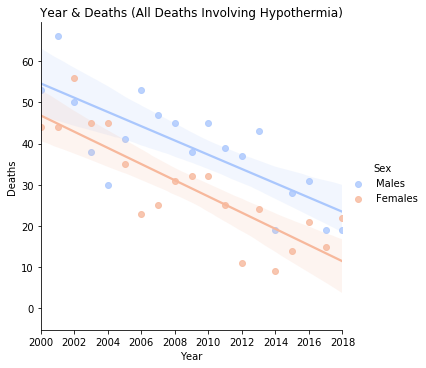

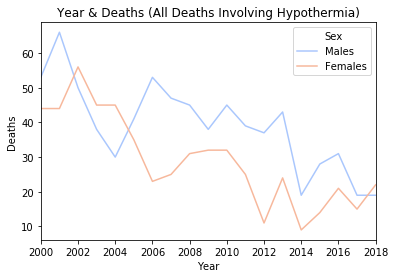

In [4]:
#Hypothermia Deaths
#The relationship between sex/year and number of deaths (all deaths involving hypothermia)

Hypo_Sex_All = pd.read_csv("Hypothermia Deaths/hypo-deaths-18-all-tabs_1 - Sex and type of cause - 3_All deaths involving hypothermia.csv")
Melt_Hypo_Sex_All = pd.melt(Hypo_Sex_All, id_vars=['Year'], value_vars=['Males','Females'], var_name='Sex', value_name='Deaths')

sns.lmplot(x='Year', y='Deaths', data=Melt_Hypo_Sex_All, hue='Sex', palette='coolwarm')
ax=plt.gca()
ax.set_title("Year & Deaths (All Deaths Involving Hypothermia)")
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.xlim(2000,2018)
plt.show()

sns.lineplot(x='Year', y='Deaths', data=Melt_Hypo_Sex_All, hue='Sex', palette='coolwarm')
ax=plt.gca()
ax.set_title("Year & Deaths (All Deaths Involving Hypothermia)")
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.xlim(2000,2018)
plt.show()

#### Reflect and Hypothesise: 
It is shown in the graphs that there's a strong connection between sex and hypothermia deaths (including hypothermia was the underlying cause of the death, hypothermia was mentioned as a factor contributing to the death, and all deaths involving hypothermia). It's easy to see that in most years from 2000 to 2018 male's number of hypothermia deaths is much more than female.

`#Hypothermia Deaths`
`#The relationship between sex/year and number of deaths`

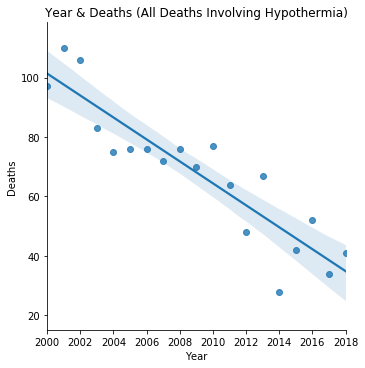

r-value: -0.91


In [5]:
#Hypothermia Deaths
#The relationship between year and number of deaths (all deaths involving hypothermia)

sns.lmplot(x='Year', y='All', data=Hypo_Sex_All)
ax=plt.gca()
ax.set_title("Year & Deaths (All Deaths Involving Hypothermia)")
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.set(ylabel="Deaths")
plt.xlim(2000,2018)
plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(Hypo_Sex_All['Year'], Hypo_Sex_All['All'])
print("r-value: "+"{:.2f}".format(r_value))

#### Reflect and Hypothesise: 
From the graphs, I think there's a connection between year and hypothermia deaths. We can see that from 2000 to 2018, in general, the number of hypothermia deaths is declining, which is a good sign. And the r-value is about -0.9, which means the linear relationship is pretty strong.

`#Hypothermia Deaths`
`#The relationship between year and number of deaths (all deaths involving hypothermia)`

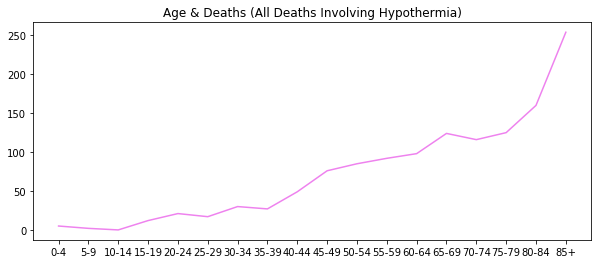

In [6]:
#Hypothermia Deaths
#The relationship between age and number of deaths (all deaths involving hypothermia)

Hypo_Age_All = pd.read_csv("Hypothermia Deaths/hypo-deaths-18-all-tabs_2 - Age-group - 2_All deaths involving hypothermia.csv")
#print(Hypo_Age_All)
sumHypoAgeAll = []
for column in Hypo_Age_All:
    sumHypoAgeAll.append(Hypo_Age_All[column].sum())
#del Hypo_Age_All[0]
#Hypo_Age_All_Sum = Hypo_Age_All.append(sumHypoAgeAll, ignore_index=True)
Hypo_Age_All_Sum = Hypo_Age_All
Hypo_Age_All_Sum.loc['Sum'] = sumHypoAgeAll
Hypo_Age_All_Sum = Hypo_Age_All.drop(columns=['Year','All ages'], axis=1)
#Hypo_Age_All_Sum = Hypo_Age_All_Sum.drop(index=range(19), axis=1)
Hypo_Age_All_Sum = Hypo_Age_All_Sum.T
#pd.melt(Hypo_Age_All_Sum, id_vars=index, value_vars=['Males','Females'], var_name='Sex', value_name='Deaths')
Hypo_Age_All_Sum = Hypo_Age_All_Sum.reset_index()
Hypo_Age_All_Sum = Hypo_Age_All_Sum.rename(columns={'index':'Age'})
#print(Hypo_Age_All_Sum)

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
#sns.lineplot(x='Age', y='Sum', data=Hypo_Age_All_Sum)
plt.xticks(arange(len(Hypo_Age_All_Sum['Age'])),Hypo_Age_All_Sum['Age']) #Fix the problem that x-axis isn't in right order
plt.plot(Hypo_Age_All_Sum['Sum'], color='violet')
ax=plt.gca()
ax.set_title("Age & Deaths (All Deaths Involving Hypothermia)")
plt.show()

#### Reflect and Hypothesise: 
The lineplot describes a connection between age and hypothermia deaths. In general, the number of hypothermia deaths increases with age.

`#Hypothermia Deaths`
`#The relationship between age and number of deaths (all deaths involving hypothermia)`

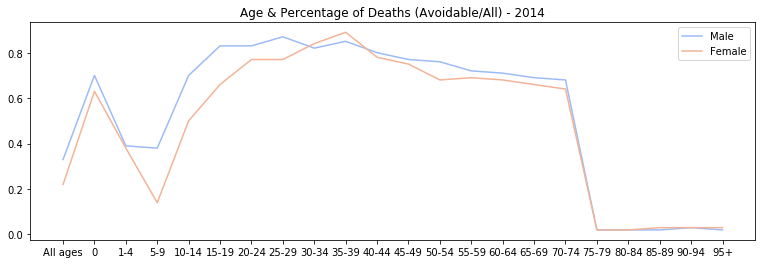

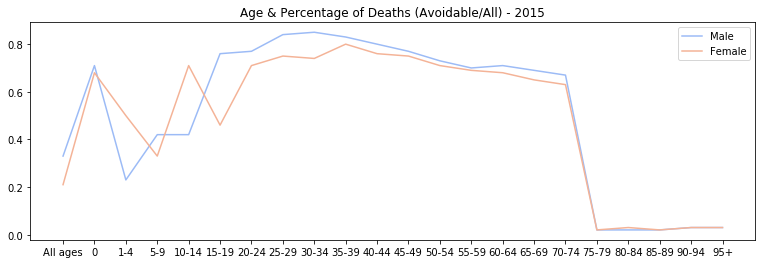

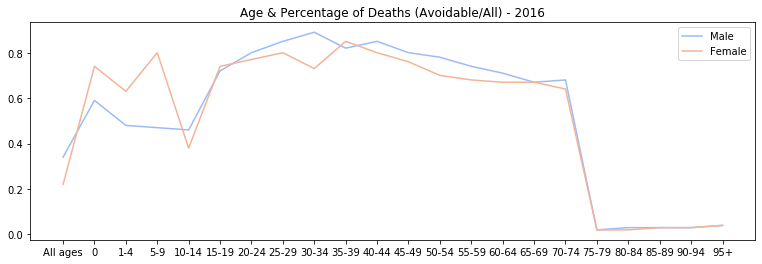

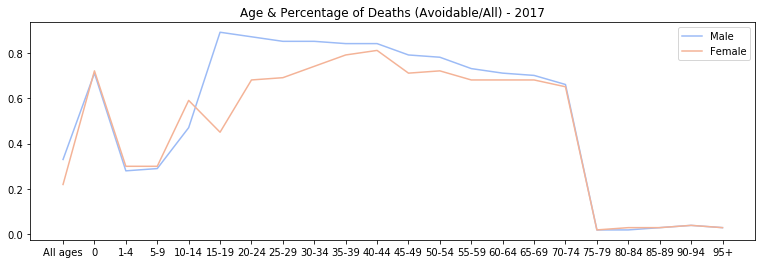

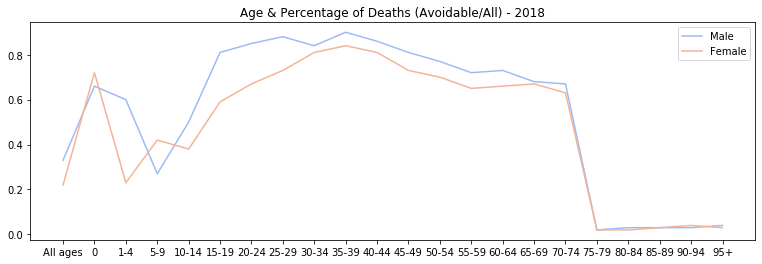

In [7]:
#Avoidable Mortality
#The relationship between sex/age and percentage of avoidable deaths in all deaths

Avoid_Percentage_All = pd.read_csv("Avoidable Mortality/avoid-mortality-18-all-tabs_Table 3 - 7_% of all deaths - All.csv")
Avoid_Percentage_Male = pd.read_csv("Avoidable Mortality/avoid-mortality-18-all-tabs_Table 3 - 8_% of all deaths - Male.csv")
Avoid_Percentage_Female = pd.read_csv("Avoidable Mortality/avoid-mortality-18-all-tabs_Table 3 - 9_% of all deaths - Female.csv")
#Melt_Avoid_Percentage = pd.melt(Avoid_Percentage_Male, id_vars=['Age-group'], value_vars=['Males','Females'], var_name='Sex', value_name='Percentage')
#Avoid_Percentage_Male = Avoid_Percentage_Male.drop([0])
#Avoid_Percentage_Female = Avoid_Percentage_Female.drop([0])

fig = plt.figure(figsize=(13,4)) #Change the size of the figure
#sns.lineplot(x='Age-group', y='2014', data=Avoid_Percentage_Male)
plt.xticks(arange(len(Avoid_Percentage_Male['Age-group'])),Avoid_Percentage_Male['Age-group']) #Fix the problem that x-axis isn't in right order
plt.plot(Avoid_Percentage_Male['2014'], color='#9cbbf6')
plt.plot(Avoid_Percentage_Female['2014'], color='#f4b397')
ax=plt.gca()
ax.set_title("Age & Percentage of Deaths (Avoidable/All) - 2014")
plt.legend(labels=['Male','Female'])
plt.show()

fig = plt.figure(figsize=(13,4)) #Change the size of the figure
plt.xticks(arange(len(Avoid_Percentage_Male['Age-group'])),Avoid_Percentage_Male['Age-group']) #Fix the problem that x-axis isn't in right order
plt.plot(Avoid_Percentage_Male['2015'], color='#9cbbf6')
plt.plot(Avoid_Percentage_Female['2015'], color='#f4b397')
ax=plt.gca()
ax.set_title("Age & Percentage of Deaths (Avoidable/All) - 2015")
plt.legend(labels=['Male','Female'])
plt.show()

fig = plt.figure(figsize=(13,4)) #Change the size of the figure
plt.xticks(arange(len(Avoid_Percentage_Male['Age-group'])),Avoid_Percentage_Male['Age-group']) #Fix the problem that x-axis isn't in right order
plt.plot(Avoid_Percentage_Male['2016'], color='#9cbbf6')
plt.plot(Avoid_Percentage_Female['2016'], color='#f4b397')
ax=plt.gca()
ax.set_title("Age & Percentage of Deaths (Avoidable/All) - 2016")
plt.legend(labels=['Male','Female'])
plt.show()

fig = plt.figure(figsize=(13,4)) #Change the size of the figure
plt.xticks(arange(len(Avoid_Percentage_Male['Age-group'])),Avoid_Percentage_Male['Age-group']) #Fix the problem that x-axis isn't in right order
plt.plot(Avoid_Percentage_Male['2017'], color='#9cbbf6')
plt.plot(Avoid_Percentage_Female['2017'], color='#f4b397')
ax=plt.gca()
ax.set_title("Age & Percentage of Deaths (Avoidable/All) - 2017")
plt.legend(labels=['Male','Female'])
plt.show()

fig = plt.figure(figsize=(13,4)) #Change the size of the figure
plt.xticks(arange(len(Avoid_Percentage_Male['Age-group'])),Avoid_Percentage_Male['Age-group']) #Fix the problem that x-axis isn't in right order
plt.plot(Avoid_Percentage_Male['2018'], color='#9cbbf6')
plt.plot(Avoid_Percentage_Female['2018'], color='#f4b397')
ax=plt.gca()
ax.set_title("Age & Percentage of Deaths (Avoidable/All) - 2018")
plt.legend(labels=['Male','Female'])
plt.show()

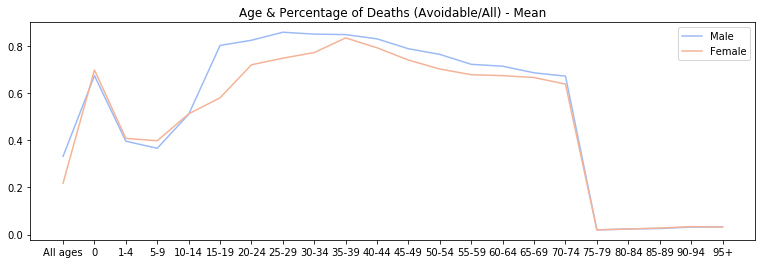

In [8]:
#Avoidable Mortality
#The relationship between sex/age and percentage of avoidable deaths in all deaths

Avoid_Percentage_Male_Mean = Avoid_Percentage_Male.set_index('Age-group', inplace=False)
meanAvoidPercentageMale = []
#for row in Avoid_Percentage_Male_Mean:
for row in range(len(Avoid_Percentage_Male_Mean)):
    meanAvoidPercentageMale.append(Avoid_Percentage_Male_Mean.iloc[row].mean())
Avoid_Percentage_Male_Mean['Mean'] = meanAvoidPercentageMale
#print(Avoid_Percentage_Male_Mean)

Avoid_Percentage_Female_Mean = Avoid_Percentage_Female.set_index('Age-group', inplace=False)
meanAvoidPercentageFemale = []
for row in range(len(Avoid_Percentage_Female_Mean)):
    meanAvoidPercentageFemale.append(Avoid_Percentage_Female_Mean.iloc[row].mean())
Avoid_Percentage_Female_Mean['Mean'] = meanAvoidPercentageFemale
#print(Avoid_Percentage_Female_Mean)

fig = plt.figure(figsize=(13,4)) #Change the size of the figure
plt.xticks(arange(len(Avoid_Percentage_Male['Age-group'])),Avoid_Percentage_Male['Age-group']) #Fix the problem that x-axis isn't in right order
plt.plot(Avoid_Percentage_Male_Mean['Mean'], color='#9cbbf6')
plt.plot(Avoid_Percentage_Female_Mean['Mean'], color='#f4b397')
ax=plt.gca()
ax.set_title("Age & Percentage of Deaths (Avoidable/All) - Mean")
plt.legend(labels=['Male','Female'])
plt.show()

#### Reflect and Hypothesise: 
From the lineplots, I think there's a connection between age/sex and percentage of avoidable deaths. Percentage of avoidable deaths in all deaths is high at the beginning, then quickly falls down until age 5-9. After that, it climbs slightly until age 70-74. In general, from age 15-19 to age 70-74, male's percentage of avoidable deaths in all deaths is higher than female's. After age 75-79, percentage of avoidable deaths in all deaths sharply falls down then tends to be stable, and there isn't any significant difference between male and female.

`#Avoidable Mortality`
`#The relationship between sex/age and percentage of avoidable deaths in all deaths`

In [9]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between sex/drug and number of deaths (Volatile Substance Abuse)
#Data Cleaning

Volatile_Sub = pd.read_csv("Volatile Substance Abuse and Helium Deaths/volatile-sub-deaths-18 - Sex & Drug-related.csv")
#Volatile_Substance = Volatile_Sub.set_index('Year in which death was registered', inplace=False)
# for index, row in Volatile_Sub.iterrows():
#     for value in row:
#         if value == '.':
#             value = 0
#         if np.isnan(value) == True:
#             value = 0
Volatile_Sub_Cleaned = Volatile_Sub.replace('.', 0) #Change . to 0
Volatile_Sub_Cleaned = Volatile_Sub_Cleaned.fillna(0) #Change NaN to 0
Volatile_Sub_Cleaned = Volatile_Sub_Cleaned.astype(int) #Change all datatype to int
#print(Volatile_Sub_Cleaned.head())

for value in Volatile_Sub_Cleaned['Year in which death was registered']:
    assert 1900<value<2019, "The year is not right"
for value in Volatile_Sub_Cleaned['All']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned['3-year moving annual average']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned['5-year moving annual average']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned['Male']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned['Female']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned['not counted in NRS standard definition (Drug-related)']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned['counted in NRS standard definition (Drug-related)']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned["not counted in ONS 'wide' definition (Drug-related)"]:
    assert 0<=value<100, "The number of deaths is not right"
for value in Volatile_Sub_Cleaned["counted in ONS 'wide' definition (Drug-related)"]:
    assert 0<=value<100, "The number of deaths is not right"

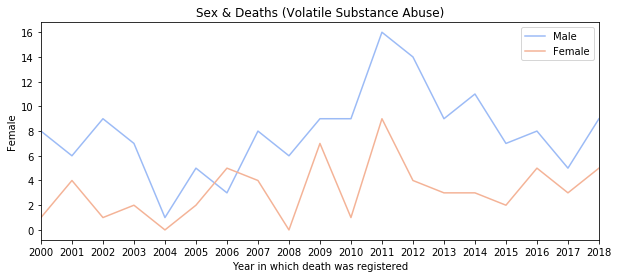

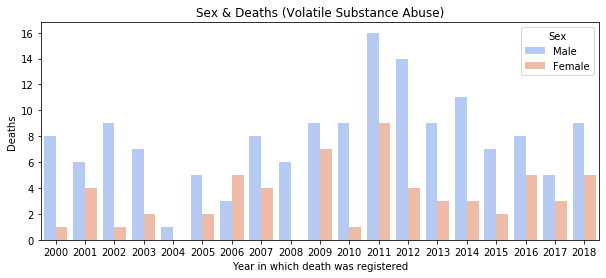

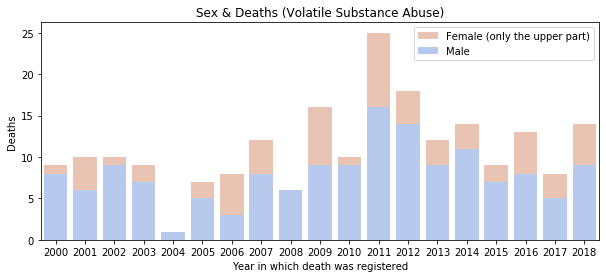

About 71.09% are male


In [10]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between sex and number of deaths (Volatile Substance Abuse)

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.lineplot(x='Year in which death was registered', y='Male', data=Volatile_Sub_Cleaned, color='#9cbbf6')
sns.lineplot(x='Year in which death was registered', y='Female', data=Volatile_Sub_Cleaned, color='#f4b397')
ax=plt.gca()
ax.set_title("Sex & Deaths (Volatile Substance Abuse)")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.legend(labels=['Male','Female'])
plt.xlim(2000,2018)
plt.show()

Melt_Volatile_Sub_Sex = pd.melt(Volatile_Sub_Cleaned, id_vars=['Year in which death was registered'], value_vars=['Male','Female'], var_name='Sex', value_name='Deaths')
fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.barplot(x='Year in which death was registered', y="Deaths", data=Melt_Volatile_Sub_Sex, hue = 'Sex', palette='coolwarm')
ax=plt.gca()
ax.set_title("Sex & Deaths (Volatile Substance Abuse)")
plt.show()

#sns.set(style="whitegrid")
fig = plt.figure(figsize=(10,4)) #Change the size of the figure
#sns.set_color_codes("pastel")
sns.barplot(x="Year in which death was registered", y="All", data=Volatile_Sub_Cleaned, label="Female (only the upper part)", color='#f3c0aa') #color="b"
#sns.set_color_codes("muted")
sns.barplot(x="Year in which death was registered", y="Male", data=Volatile_Sub_Cleaned, label="Male", color='#aec7f7') #color="b"
ax=plt.gca()
ax.set_title("Sex & Deaths (Volatile Substance Abuse)")
ax.set(ylabel="Deaths",xlabel="Year in which death was registered")
#ax.legend(ncol=2, loc="lower right", frameon=True)
#sns.despine(left=True, bottom=True)
plt.legend() #Show labels
plt.show()

allVolatileSub = np.sum(Volatile_Sub_Cleaned['All'])
maleVolatileSub = np.sum(Volatile_Sub_Cleaned["Male"])
print("About "+"{:.2f}".format(maleVolatileSub/allVolatileSub*100)+"% are male")

#### Reflect and Hypothesise: 
As can be found from the graphs and data, there's a connection between sex and volatile substance abuse deaths. It's easy to see that from 2000 to 2018 the number of volatile substance abuse deaths of the male is much more than that of the female. According to calculate, about 71.09% of deaths are male.

`#Volatile Substance Abuse and Helium Deaths`
`#The relationship between sex and number of deaths (Volatile Substance Abuse)`

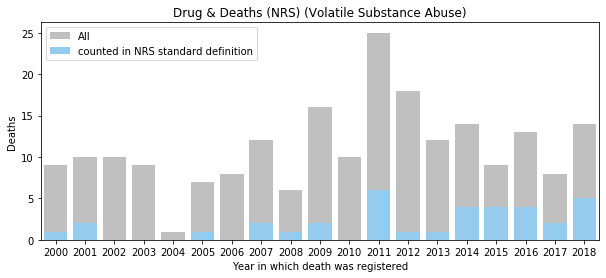

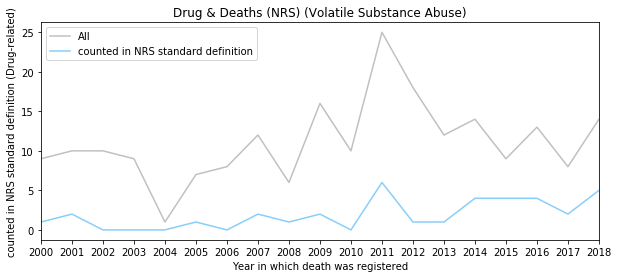

About 17.06% is counted in NRS standard definition (Drug-related)


In [11]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between drug and number of deaths (Volatile Substance Abuse)
#NRS

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.set_color_codes("pastel")
sns.barplot(x="Year in which death was registered", y="All", data=Volatile_Sub_Cleaned, label="All", color='silver')
sns.set_color_codes("muted")
sns.barplot(x="Year in which death was registered", y="counted in NRS standard definition (Drug-related)", data=Volatile_Sub_Cleaned, label="counted in NRS standard definition", color='lightskyblue')
ax=plt.gca()
ax.set_title("Drug & Deaths (NRS) (Volatile Substance Abuse)")
ax.set(ylabel="Deaths",xlabel="Year in which death was registered")
plt.legend() #Show labels
plt.show()

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.lineplot(x='Year in which death was registered', y='All', data=Volatile_Sub_Cleaned, color='silver')
sns.lineplot(x='Year in which death was registered', y='counted in NRS standard definition (Drug-related)', data=Volatile_Sub_Cleaned, color='lightskyblue')
ax=plt.gca()
ax.set_title("Drug & Deaths (NRS) (Volatile Substance Abuse)")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.legend(labels=['All','counted in NRS standard definition'])
plt.xlim(2000,2018)
plt.show()

nrsVolatileSub = np.sum(Volatile_Sub_Cleaned["counted in NRS standard definition (Drug-related)"])
print("About "+"{:.2f}".format(nrsVolatileSub/allVolatileSub*100)+"% is counted in NRS standard definition (Drug-related)")

# Volatile_Sub_Cleaned['NRS'] = Volatile_Sub_Cleaned["counted in NRS standard definition (Drug-related)"]/Volatile_Sub_Cleaned['All']
# print(np.mean(Volatile_Sub_Cleaned['NRS'])*100, "% is counted in NRS standard definition (Drug-related)")

# sns.lmplot(x='Year in which death was registered', y='NRS', data=Volatile_Sub_Cleaned)
# ax=plt.gca()
# ax.set_title("Number of Deaths' Relationship to Drug(NRS) (Volatile Substance Abuse)")
# ax.xaxis.set_major_locator(MultipleLocator(2))
# plt.xlim(2000,2018)
# plt.show()
# slope, intercept, r_value, p_value, std_err = stats.linregress(Volatile_Sub_Cleaned['Year in which death was registered'], Volatile_Sub_Cleaned['NRS'])
# print('r-value:',r_value)

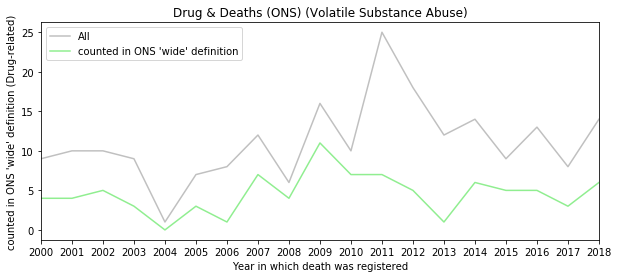

About 41.23% is counted in ONS 'wide' definition (Drug-related)


In [12]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between drug and number of deaths (Volatile Substance Abuse)
#ONS

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.set_color_codes("pastel")
sns.barplot(x="Year in which death was registered", y="All", data=Volatile_Sub_Cleaned, label="All", color='silver')
sns.set_color_codes("muted")
sns.barplot(x="Year in which death was registered", y="counted in ONS 'wide' definition (Drug-related)", data=Volatile_Sub_Cleaned, label="counted in ONS 'wide' definition", color='lightgreen')
ax=plt.gca()
ax.set_title("Drug & Deaths (ONS) (Volatile Substance Abuse)")
ax.set(ylabel="Deaths",xlabel="Year in which death was registered")
plt.legend() #Show labels
plt.show()

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.lineplot(x='Year in which death was registered', y='All', data=Volatile_Sub_Cleaned, color='silver')
sns.lineplot(x='Year in which death was registered', y="counted in ONS 'wide' definition (Drug-related)", data=Volatile_Sub_Cleaned, color='lightgreen')
ax=plt.gca()
ax.set_title("Drug & Deaths (ONS) (Volatile Substance Abuse)")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.legend(labels=['All',"counted in ONS 'wide' definition"])
plt.xlim(2000,2018)
plt.show()

onsVolatileSub = np.sum(Volatile_Sub_Cleaned["counted in ONS 'wide' definition (Drug-related)"])
print("About "+"{:.2f}".format(onsVolatileSub/allVolatileSub*100)+"% is counted in ONS 'wide' definition (Drug-related)")

# Volatile_Sub_Cleaned['ONS'] = Volatile_Sub_Cleaned["counted in ONS 'wide' definition (Drug-related)"]/Volatile_Sub_Cleaned['All']
# print(np.mean(Volatile_Sub_Cleaned['ONS'])*100, "% is counted in ONS 'wide' definition (Drug-related)")

# sns.lmplot(x='Year in which death was registered', y='ONS', data=Volatile_Sub_Cleaned)
# ax=plt.gca()
# ax.set_title("Number of Deaths' Relationship to Drug(ONS) (Volatile Substance Abuse)")
# ax.xaxis.set_major_locator(MultipleLocator(2))
# plt.xlim(2000,2018)
# plt.show()
# slope, intercept, r_value, p_value, std_err = stats.linregress(Volatile_Sub_Cleaned['Year in which death was registered'], Volatile_Sub_Cleaned['ONS'])
# print('r-value:',r_value)

#### Reflect and Hypothesise: 
When it comes to the relationship between drug and number of volatile substance abuse deaths, we can observe that about 17.06% of them are counted as drug-related in NRS standard definition, and about 41.23% of them are counted as drug-related in ONS 'wide' definition.

`#Volatile Substance Abuse and Helium Deaths`
`#The relationship between drug and number of deaths (Volatile Substance Abuse)`

In [13]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between sex/drug and number of deaths (Helium Deaths)
#Data Cleaning

Helium = pd.read_csv("Volatile Substance Abuse and Helium Deaths/helium-deaths-18 - Sex & Drug-related.csv")
Helium_Cleaned = Helium.replace('.', 0) #Change . to 0
Helium_Cleaned = Helium_Cleaned.fillna(0) #Change NaN to 0
Helium_Cleaned = Helium_Cleaned.astype(int) #Change all datatype to int
#print(Helium_Cleaned.head())

for value in Helium_Cleaned['Year in which death was registered']:
    assert 1900<value<2019, "The year is not right"
for value in Helium_Cleaned['All']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned['3-year moving annual average']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned['5-year moving annual average']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned['Male']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned['Female']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned['not counted in NRS standard definition (Drug-related)']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned['counted in NRS standard definition (Drug-related)']:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned["not counted in ONS 'wide' definition (Drug-related)"]:
    assert 0<=value<100, "The number of deaths is not right"
for value in Helium_Cleaned["counted in ONS 'wide' definition (Drug-related)"]:
    assert 0<=value<100, "The number of deaths is not right"

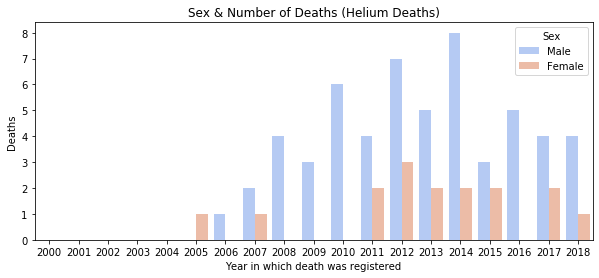

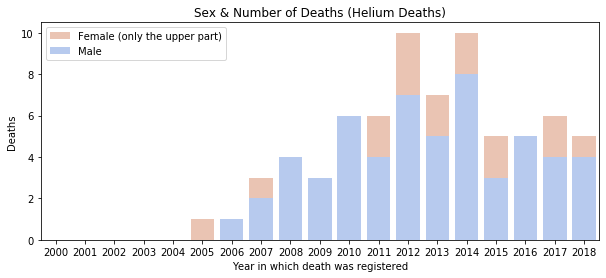

About 77.78% are male


In [14]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between sex and number of deaths (Helium Deaths)

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.lineplot(x='Year in which death was registered', y='Male', data=Helium_Cleaned, color='#9cbbf6')
sns.lineplot(x='Year in which death was registered', y='Female', data=Helium_Cleaned, color='#f4b397')
ax=plt.gca()
ax.set_title("Sex & Number of Deaths (Helium Deaths)")
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.legend(labels=['Male','Female'])
plt.xlim(2000,2018)
plt.show()

Melt_Helium_Cleaned_Sex = pd.melt(Helium_Cleaned, id_vars=['Year in which death was registered'], value_vars=['Male','Female'], var_name='Sex', value_name='Deaths')
fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.barplot(x='Year in which death was registered', y="Deaths", data=Melt_Helium_Cleaned_Sex, hue = 'Sex', palette='coolwarm')
ax=plt.gca()
ax.set_title("Sex & Number of Deaths (Helium Deaths)")
plt.show()

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.set_color_codes("pastel")
sns.barplot(x="Year in which death was registered", y="All", data=Helium_Cleaned, label="Female (only the upper part)", color='#f3c0aa')
sns.set_color_codes("muted")
sns.barplot(x="Year in which death was registered", y="Male", data=Helium_Cleaned, label="Male", color='#aec7f7')
ax=plt.gca()
ax.set_title("Sex & Number of Deaths (Helium Deaths)")
ax.set(ylabel="Deaths",xlabel="Year in which death was registered")
plt.legend() #Show labels
plt.show()

allHelium = np.sum(Helium_Cleaned['All'])
maleHelium = np.sum(Helium_Cleaned["Male"])
print("About "+"{:.2f}".format(maleHelium/allHelium*100)+"% are male")

#### Reflect and Hypothesise: 
As can be found from the graphs and data, there's a connection between sex and helium deaths. It's easy to see that from 2000 to 2018 the number of helium deaths of the male is much more than that of the female. According to calculate, about 77.78% of deaths are male.

`#Volatile Substance Abuse and Helium Deaths`
`#The relationship between sex and number of deaths (Helium Deaths)`

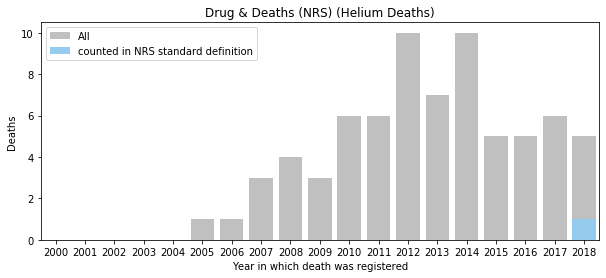

About 1.39% is counted in NRS standard definition (Drug-related)


In [15]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between drug and number of deaths (Helium Deaths)
#NRS

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.set_color_codes("pastel")
sns.barplot(x="Year in which death was registered", y="All", data=Helium_Cleaned, label="All", color='silver')
sns.set_color_codes("muted")
sns.barplot(x="Year in which death was registered", y="counted in NRS standard definition (Drug-related)", data=Helium_Cleaned, label="counted in NRS standard definition", color='lightskyblue')
ax=plt.gca()
ax.set_title("Drug & Deaths (NRS) (Helium Deaths)")
ax.set(ylabel="Deaths",xlabel="Year in which death was registered")
plt.legend() #Show labels
plt.show()

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.lineplot(x='Year in which death was registered', y='All', data=Helium_Cleaned, color='silver')
sns.lineplot(x='Year in which death was registered', y='counted in NRS standard definition (Drug-related)', data=Helium_Cleaned, color='lightskyblue')
ax=plt.gca()
ax.set_title("Drug & Deaths (NRS) (Helium Deaths)")
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.legend(labels=['All','counted in NRS standard definition'])
plt.xlim(2000,2018)
plt.show()

nrsHelium = np.sum(Helium_Cleaned["counted in NRS standard definition (Drug-related)"])
print("About "+"{:.2f}".format(nrsHelium/allHelium*100)+"% is counted in NRS standard definition (Drug-related)")

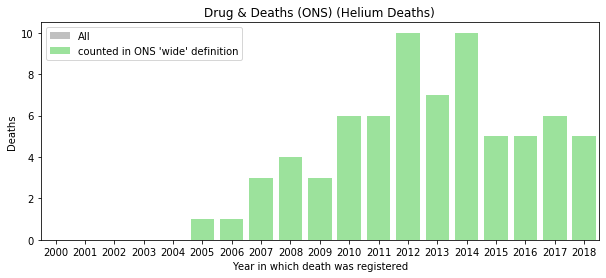

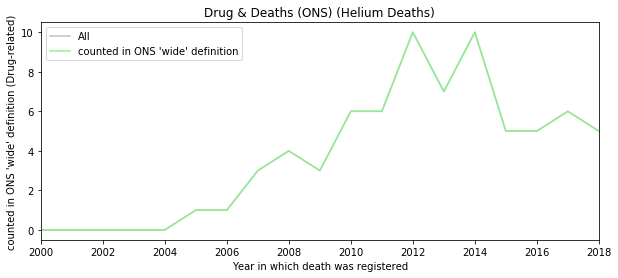

About 100.00% is counted in ONS 'wide' definition (Drug-related)


In [16]:
#Volatile Substance Abuse and Helium Deaths
#The relationship between drug and number of deaths (Helium Deaths)
#ONS

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.set_color_codes("pastel")
sns.barplot(x="Year in which death was registered", y="All", data=Helium_Cleaned, label="All", color='silver')
sns.set_color_codes("muted")
sns.barplot(x="Year in which death was registered", y="counted in ONS 'wide' definition (Drug-related)", data=Helium_Cleaned, label="counted in ONS 'wide' definition", color='lightgreen')
ax=plt.gca()
ax.set_title("Drug & Deaths (ONS) (Helium Deaths)")
ax.set(ylabel="Deaths",xlabel="Year in which death was registered")
plt.legend() #Show labels
plt.show()

fig = plt.figure(figsize=(10,4)) #Change the size of the figure
sns.lineplot(x='Year in which death was registered', y='All', data=Helium_Cleaned, color='silver')
sns.lineplot(x='Year in which death was registered', y="counted in ONS 'wide' definition (Drug-related)", data=Helium_Cleaned, color='lightgreen')
ax=plt.gca()
ax.set_title("Drug & Deaths (ONS) (Helium Deaths)")
ax.xaxis.set_major_locator(MultipleLocator(2))
plt.legend(labels=['All',"counted in ONS 'wide' definition"])
plt.xlim(2000,2018)
plt.show()

onsHelium = np.sum(Helium_Cleaned["counted in ONS 'wide' definition (Drug-related)"])
print("About "+"{:.2f}".format(onsHelium/allHelium*100)+"% is counted in ONS 'wide' definition (Drug-related)")

#### Reflect and Hypothesise: 
When it comes to the relationship between drug and number of helium deaths, it weird that only 1.39% of them are counted as drug-related in NRS standard definition, but all of them are counted as drug-related in ONS 'wide' definition.

`#Volatile Substance Abuse and Helium Deaths`
`#The relationship between drug and number of deaths (Helium Deaths)`

In [17]:
#Drug-related Deaths in Scotland

DRD_15to64 = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries - Scotland rates on EMCDDA basis.csv")
#DRD_15to64 = DRD_15to64.rename(columns = {'Unnamed: 0':'About'})
#DRD_15to64 = DRD_15to64.set_index('About', inplace=False)
#DRD_15to64.columns.values.tolist() #Get columns' names

DRD_15to64_Countries_Num = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 1 - drug-ind EMCDDA defn - 1_Number.csv")
DRD_15to64_Countries_PerM = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 1 - drug-ind EMCDDA defn - 2_Per million population aged 15 to 64.csv")

#DRD_All_NRS_Num = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 2 - drug-rel standard def - 1_Drug-related (or 'drug misuse') deaths.csv")
#DRD_All_NRS_Pop = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 2 - drug-rel standard def - 2_Population (all ages).csv")
DRD_All_NRS_PerM = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 2 - drug-rel standard def - 3_Drug-related deaths per million population.csv")
DRD_All_NRS_Ratio = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 2 - drug-rel standard def - 4_Ratio of the Scottish drug-death rate to that of ... .csv")

#DRD_All_ONS_Num = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 3 - based on ONS wide def - 1_ONS 'wide' definition ('drug poisoning') deaths.csv")
#DRD_All_ONS_Pop = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 3 - based on ONS wide def - 2_Population (all ages).csv")
DRD_All_ONS_PerM = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 3 - based on ONS wide def - 3_ONS 'wide' definition deaths per million population.csv")
DRD_All_ONS_Ratio = pd.read_csv("Drug-related Deaths in Scotland/drd-comparison-with-other-countries_Table 3 - based on ONS wide def - 4_Ratio of the Scottish drug-death rate to that of ... .csv")

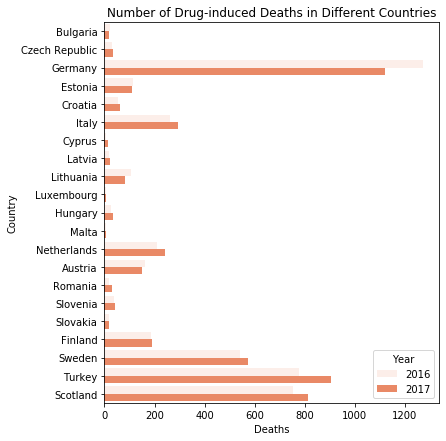

In [18]:
#Drug-related Deaths in Scotland
#Number of drug-induced deaths in different countries

#Data Cleaning
DRD_15to64_Countries_Num_Cleaned = DRD_15to64_Countries_Num.loc[DRD_15to64_Countries_Num['2016']!='..']
DRD_15to64_Countries_Num_Cleaned = DRD_15to64_Countries_Num_Cleaned.loc[DRD_15to64_Countries_Num['2017']!='..']
DRD_15to64_Countries_Num_Cleaned['2016'] = DRD_15to64_Countries_Num_Cleaned['2016'].astype(int) #Change all datatype to int
DRD_15to64_Countries_Num_Cleaned['2017'] = DRD_15to64_Countries_Num_Cleaned['2017'].astype(int) #Change all datatype to int
#DRD_15to64_Countries_Num_Cleaned['2018'] = DRD_15to64_Countries_Num_Cleaned['2018'].astype(int) #Change all datatype to int

for value in DRD_15to64_Countries_Num_Cleaned['2016']:
    assert 0<value<10000, "The number of deaths in 2016 is not right"
for value in DRD_15to64_Countries_Num_Cleaned['2017']:
    assert 0<=value<10000, "The number of deaths in 2017 is not right"

Melt_DRD_15to64_Countries_Num = pd.melt(DRD_15to64_Countries_Num_Cleaned, id_vars=['Country'], value_vars=['2016','2017'], var_name='Year', value_name='Deaths')
fig = plt.figure(figsize=(6,7)) #Change the size of the figure
#plt.tick_params(axis='x', labelsize=8) #Change the font sizes
sns.barplot(x='Deaths', y='Country', data=Melt_DRD_15to64_Countries_Num, hue='Year', color='coral')
ax=plt.gca()
ax.set_title("Number of Drug-induced Deaths in Different Countries")
plt.show()

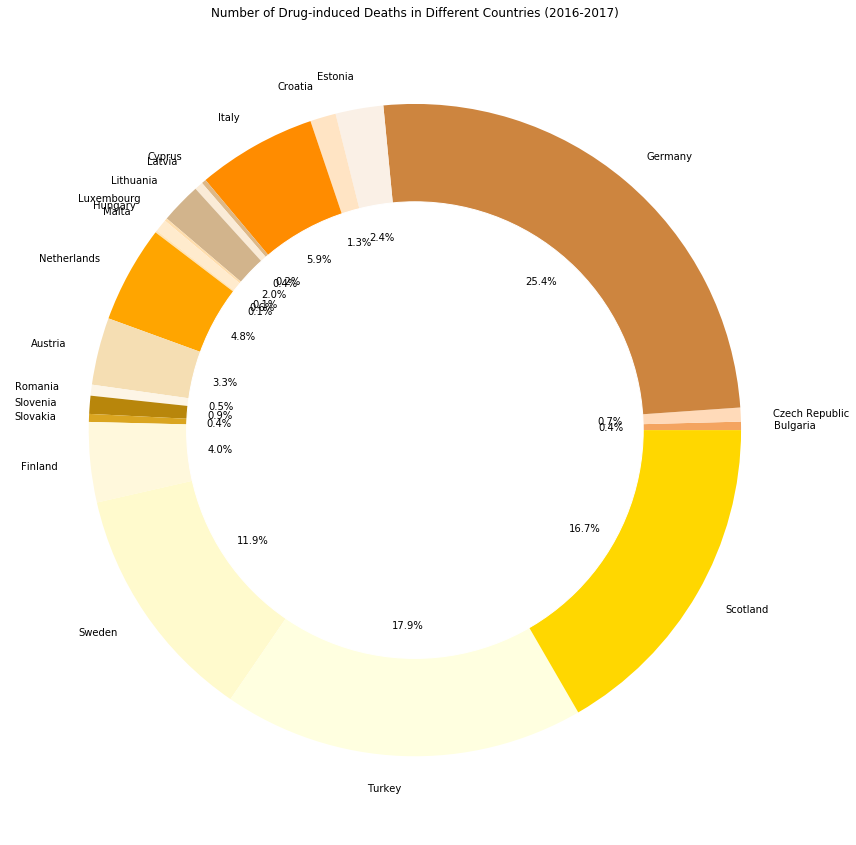

In [19]:
#Drug-related Deaths in Scotland
#Number of drug-induced deaths in different countries

yellowcolors = ['sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'moccasin', 'orange', 'wheat', 'oldlace', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'lemonchiffon', 'lightyellow', 'gold'] #Set colors
DRD_15to64_Countries_Num_Cleaned['16+17'] = DRD_15to64_Countries_Num_Cleaned['2016']+DRD_15to64_Countries_Num_Cleaned['2017']
fig = plt.figure(figsize=(15,15)) #Change the size of the figure
plt.pie(DRD_15to64_Countries_Num_Cleaned['16+17'], labels=DRD_15to64_Countries_Num_Cleaned['Country'], autopct='%1.1f%%', colors=yellowcolors)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax=plt.gca()
ax.set_title("Number of Drug-induced Deaths in Different Countries (2016-2017)")
plt.show()

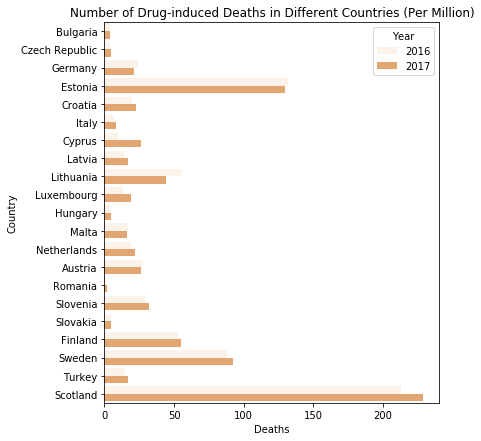

In [20]:
#Drug-related Deaths in Scotland
#Number of drug-induced deaths in different countries

#Data Cleaning
DRD_15to64_Countries_PerM_Cleaned = DRD_15to64_Countries_PerM.loc[DRD_15to64_Countries_Num['2016']!='..']
DRD_15to64_Countries_PerM_Cleaned = DRD_15to64_Countries_PerM_Cleaned.loc[DRD_15to64_Countries_Num['2017']!='..']
DRD_15to64_Countries_PerM_Cleaned['2016'] = DRD_15to64_Countries_PerM_Cleaned['2016'].astype(int) #Change all datatype to int
DRD_15to64_Countries_PerM_Cleaned['2017'] = DRD_15to64_Countries_PerM_Cleaned['2017'].astype(int) #Change all datatype to intMelt_DRD_15to64_Countries_PerM = pd.melt(DRD_15to64_Countries_PerM_Cleaned, id_vars=['Country'], value_vars=['2016','2017'], var_name='Year', value_name='Deaths')

for value in DRD_15to64_Countries_PerM_Cleaned['2016']:
    assert 0<value<1000, "The number of deaths in 2016 is not right"
for value in DRD_15to64_Countries_PerM_Cleaned['2017']:
    assert 0<=value<1000, "The number of deaths in 2017 is not right"

Melt_DRD_15to64_Countries_PerM = pd.melt(DRD_15to64_Countries_PerM_Cleaned, id_vars=['Country'], value_vars=['2016','2017'], var_name='Year', value_name='Deaths')
fig = plt.figure(figsize=(6,7)) #Change the size of the figure
sns.barplot(x='Deaths', y='Country', data=Melt_DRD_15to64_Countries_PerM, hue='Year', color='sandybrown')
ax=plt.gca()
ax.set_title("Number of Drug-induced Deaths in Different Countries (Per Million)")
plt.show()

#### Reflect and Hypothesise: 
As for the number of drug-induced deaths in different countries, we can see that the number of drug-induced deaths in Scotland is large, and the number of drug-induced deaths per million population aged 15 to 64 in Scotland is much bigger than other countries.

`#Drug-related Deaths in Scotland`
`#Number of drug-induced deaths in different countries`

In [21]:
#Drug-related Deaths in Scotland
#Number of drug-induced deaths in different regions of UK (NRS's standard definition)

DRD_All_NRS_PerM = DRD_All_NRS_PerM.rename(columns = {'Unnamed: 0':'Region'})
Melt_DRD_All_NRS_PerM = pd.melt(DRD_All_NRS_PerM, id_vars=['Region'], value_vars=['2016','2017','2018'], var_name='Year', value_name='Deaths')
sns.barplot(x='Deaths', y='Region', data=Melt_DRD_All_NRS_PerM, hue='Year', color='lightskyblue')
ax=plt.gca()
ax.set_title("Number of Drug-induced Deaths in Different Regions of UK (NRS) (Per Million)")
plt.show()

DRD_All_NRS_Ratio = DRD_All_NRS_Ratio.rename(columns = {'Unnamed: 0':'Region'})
Melt_DRD_All_NRS_Ratio = pd.melt(DRD_All_NRS_Ratio, id_vars=['Region'], value_vars=['2016','2017','2018'], var_name='Year', value_name='Deaths')
sns.lineplot(x='Year', y='Deaths', data=Melt_DRD_All_NRS_Ratio, hue='Region', palette='coolwarm')
ax=plt.gca()
ax.set_title("Ratio of the Scottish Drug-death Rate to that of Other Regions of UK (NRS)")
plt.show()

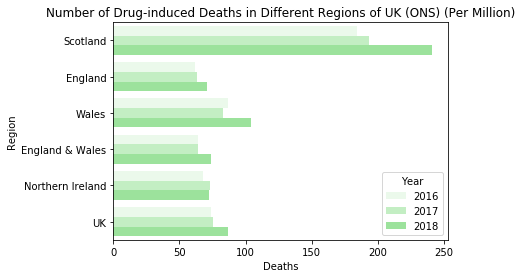

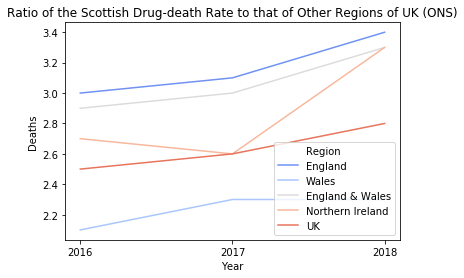

In [22]:
#Drug-related Deaths in Scotland
#Number of drug-induced deaths in different regions of UK (ONS 'wide' definition)

DRD_All_ONS_PerM = DRD_All_ONS_PerM.rename(columns = {'Unnamed: 0':'Region'})
Melt_DRD_All_ONS_PerM = pd.melt(DRD_All_ONS_PerM, id_vars=['Region'], value_vars=['2016','2017','2018'], var_name='Year', value_name='Deaths')
#fig = plt.figure(figsize=(9,4)) #Change the size of the figure
sns.barplot(x='Deaths', y='Region', data=Melt_DRD_All_ONS_PerM, hue='Year', color='lightgreen')
ax=plt.gca()
ax.set_title("Number of Drug-induced Deaths in Different Regions of UK (ONS) (Per Million)")
plt.show()

DRD_All_ONS_Ratio = DRD_All_ONS_Ratio.rename(columns = {'Unnamed: 0':'Region'})
Melt_DRD_All_ONS_Ratio = pd.melt(DRD_All_ONS_Ratio, id_vars=['Region'], value_vars=['2016','2017','2018'], var_name='Year', value_name='Deaths')
sns.lineplot(x='Year', y='Deaths', data=Melt_DRD_All_ONS_Ratio, hue='Region', palette='coolwarm')
ax=plt.gca()
ax.set_title("Ratio of the Scottish Drug-death Rate to that of Other Regions of UK (ONS)")
plt.show()

#### Reflect and Hypothesise: 
It is shown in the graphs that the number of drug-deaths per million population in Scotland is more than twice as that of the other regions in both NRS and ONS definition. And that number grows with the years.

`#Drug-related Deaths in Scotland`
`#Number of drug-induced deaths in different regions of UK`

To test the hypotheses, we need further study on the causes, which include biological reasons of hypothermia deaths, drug-related deaths, volatile substance abuse and helium deaths, as well as the definition of avoidable mortality.